In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.DataFrame((pd.read_csv('../data/creditcard.csv')))
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
X = df.drop('Class', axis=1)
y = df.Class
print(y.value_counts())
y.value_counts(normalize=True)*100

0    284315
1       492
Name: Class, dtype: int64


0    99.827251
1     0.172749
Name: Class, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9983029622087239

In [6]:
y_pred = knn.predict(X_test)
f1_score(y_test,y_pred)

0.03973509933774835

In [7]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9994265182636377

In [8]:
y_pred = xgb.predict(X_test)
f1_score(y_test,y_pred)

0.8205128205128205

In [9]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9982678510820079

In [10]:
y_pred = svc.predict(X_test)
f1_score(y_test,y_pred)

0.0

## XGBoost it is!

In [11]:
y_pred_proba = xgb.predict_proba(X_test)

In [12]:
y_pred_proba = [x[1] for x in y_pred_proba]
y_pred_proba[:5]

[0.000106232874, 9.443938e-05, 0.0006928212, 0.00012144053, 0.00020072168]

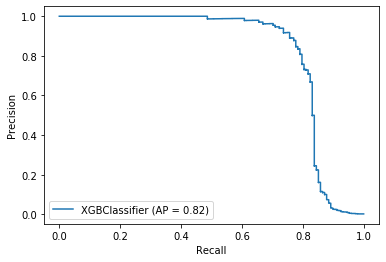

In [13]:
plot_precision_recall_curve(xgb,X_test,y_test)

In [14]:
xgb = XGBClassifier()
cross_val_score(xgb, X, y, scoring='f1', verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


array([0.02152427, 0.8839779 , 0.73033708, 0.8852459 , 0.79069767])